In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
x = np.zeros(50)
y = np.hstack([np.zeros(25), np.ones(25)])
z = np.vstack([x, y]).T

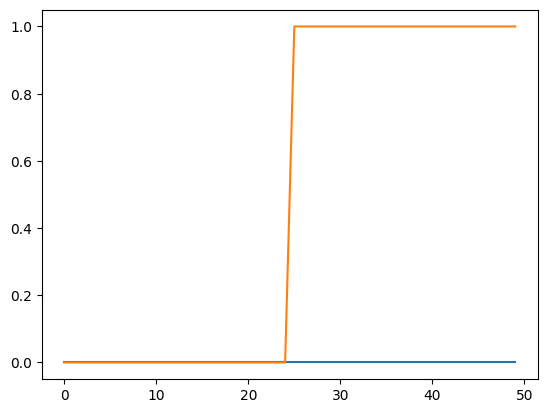

In [118]:
plt.plot(z);

In [119]:
z_t = torch.from_numpy(z).float()

In [120]:
ln = torch.nn.LayerNorm(2)

In [121]:
ln_zt = ln(z_t)

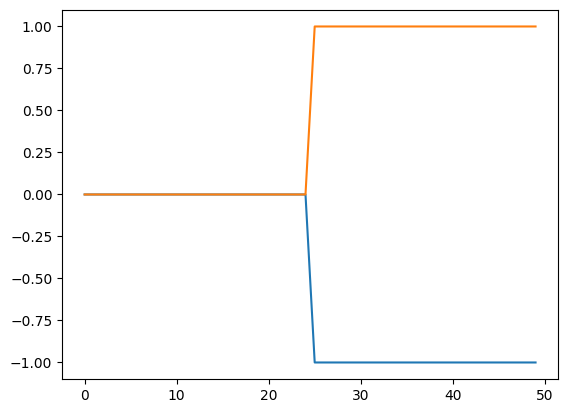

In [122]:
plt.plot(ln_zt.detach().numpy());

In [10]:
from src.datamodules.datamodule import DataModule
from src.datamodules.components.datasets import UCFVideoDataset
from src.models.components.core_models import X3D_M

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torchvision.transforms import Compose
from torchvision.transforms._transforms_video import CenterCropVideo
from pytorchvideo.transforms import Div255, Normalize, ShortSideScale

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from collections import defaultdict

In [3]:
mean = [0.45, 0.45, 0.45]
std = [0.225, 0.225, 0.225]

transform = Compose([Div255(), 
                    Normalize(mean, std), 
                    ShortSideScale(256), 
                    CenterCropVideo([256, 256])])

data = UCFVideoDataset(clip_length_in_frames=16, 
                       step_between_clips=5, 
                       path_to_data="data/explosion/", 
                       path_to_annotation="data/explosion/UCF_train_time_markup.txt",
                       path_to_clips="saves/", video_transform=transform, sampler="equal")

Equal sampling is impossible, do random sampling.


In [4]:
datamodule = DataModule(train_dataset=data)
datamodule.setup()

(<torch.utils.data.dataset.Subset at 0x7fe95dfc7fd0>,
 <torch.utils.data.dataset.Subset at 0x7fe95df203d0>)

In [5]:
extractor = X3D_M(pretrained=True, block_numbers=5, freezed=True)

Using cache found in /home/cpd/.cache/torch/hub/facebookresearch_pytorchvideo_main


In [6]:
norm_dynamic = defaultdict(list)
norm_dynamic_ln = defaultdict(list)

anom_dynamic = defaultdict(list)
anom_dynamic_ln = defaultdict(list)
stds =  [1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.5, 1]

ln = nn.LayerNorm(12288)

for g in stds:
    for batch, lab in datamodule.val_dataloader():
        print(1)
        batch_ext = extractor(batch).transpose(1, 2).flatten(2)   
        for i, (video, l) in enumerate(zip(batch_ext, lab)):
            print(i)
            video_ln = ln(video)
            if sum(l) == 0:
                norm_dynamic_ln[g].append(sum(abs(video_ln.T.detach().cpu().numpy().std(-1)) < g))
                norm_dynamic[g].append(sum(abs(video.T.detach().cpu().numpy().std(-1)) < g))
            else:
                anom_dynamic_ln[g].append(sum(abs(video_ln.T.detach().cpu().numpy().std(-1)) < g))
                anom_dynamic[g].append(sum(abs(video.T.detach().cpu().numpy().std(-1)) < g))
            break
        break
    break

1
0


In [21]:
anom_dynamic = defaultdict(list)
anom_dynamic_ln = defaultdict(list)
stds =  [1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.5, 1]

ln = nn.LayerNorm(12288)
w = 3

for g in stds:
    for batch, lab in datamodule.val_dataloader():
        batch_ext = extractor(batch).transpose(1, 2).flatten(2)   
        for video, label in zip(batch_ext, lab):
            if sum(label) != 0:
                video_ln = ln(video)
                cpd_idx = torch.where(label == 1)[0][0]
                print(cpd_idx)
                anom_dynamic_ln[g].append(sum(abs(video_ln[cpd_idx-w:cpd_idx+w].T.detach().cpu().numpy().std(-1)) < g))
                anom_dynamic[g].append(sum(abs(video[cpd_idx-w:cpd_idx+w].T.detach().cpu().numpy().std(-1)) < g))

tensor(7)
tensor(14)
tensor(15)
tensor(11)
tensor(12)
tensor(4)
tensor(9)
tensor(15)
tensor(5)
tensor(13)
tensor(3)
tensor(13)
tensor(10)
tensor(5)
tensor(12)
tensor(3)
tensor(9)
tensor(11)
tensor(6)
tensor(7)
tensor(2)
tensor(15)
tensor(0)
tensor(11)
tensor(14)
tensor(6)
tensor(6)
tensor(2)
tensor(11)
tensor(4)
tensor(9)
tensor(9)
tensor(13)
tensor(3)
tensor(7)
tensor(8)
tensor(4)
tensor(10)
tensor(0)
tensor(9)
tensor(4)
tensor(8)
tensor(3)
tensor(1)
tensor(7)
tensor(14)
tensor(15)
tensor(11)
tensor(12)
tensor(4)
tensor(9)
tensor(15)
tensor(5)
tensor(13)
tensor(3)
tensor(13)
tensor(10)
tensor(5)
tensor(12)
tensor(3)
tensor(9)
tensor(11)
tensor(6)
tensor(7)
tensor(2)
tensor(15)
tensor(0)
tensor(11)
tensor(14)
tensor(6)
tensor(6)
tensor(2)
tensor(11)
tensor(4)
tensor(9)
tensor(9)
tensor(13)
tensor(3)
tensor(7)
tensor(8)
tensor(4)
tensor(10)
tensor(0)
tensor(9)
tensor(4)
tensor(8)
tensor(3)
tensor(1)
tensor(7)
tensor(14)
tensor(15)
tensor(11)
tensor(12)
tensor(4)
tensor(9)
tensor(15)
ten

In [29]:
anom_dynamic[key] = (np.mean(anom_dynamic[key]), np.std(anom_dynamic[key]))


defaultdict(list,
            {0.0001: [2813,
              2465,
              1989,
              790,
              1294,
              1472,
              1508,
              2840,
              2330,
              1367,
              1428,
              1103,
              2164,
              2129,
              1236,
              1561,
              1110,
              1836,
              1830,
              1653,
              0,
              2638,
              0,
              1439,
              2277,
              1222,
              1243,
              0,
              1775,
              1243,
              1741,
              1089,
              986,
              1513,
              1235,
              999,
              618,
              1721,
              0,
              2112,
              2117,
              2292,
              2439,
              0],
             0.001: [2813,
              2469,
              1994,
              792,
              1298,
      

In [30]:
for key in anom_dynamic.keys():
    norm_dynamic[key] = (np.mean(norm_dynamic[key]), np.std(norm_dynamic[key]))
    norm_dynamic_ln[key] = (np.mean(norm_dynamic_ln[key]), np.std(norm_dynamic_ln[key]))
    anom_dynamic[key] = (np.mean(anom_dynamic[key]), np.std(anom_dynamic[key]))
    anom_dynamic_ln[key] = (np.mean(anom_dynamic_ln[key]), np.std(anom_dynamic_ln[key]))            

In [31]:
means = [norm_dynamic[key][0] for key in norm_dynamic.keys()]
std = [norm_dynamic[key][1] for key in norm_dynamic.keys()]
means_ln = [norm_dynamic_ln[key][0] for key in norm_dynamic.keys()]
std_ln =  [norm_dynamic_ln[key][1] for key in norm_dynamic.keys()]

In [35]:
means = [anom_dynamic[key][0] for key in anom_dynamic.keys()]
std = [anom_dynamic[key][1] for key in anom_dynamic.keys()]
means_ln = [anom_dynamic_ln[key][0] for key in anom_dynamic_ln.keys()]
std_ln =  [anom_dynamic_ln[key][1] for key in anom_dynamic_ln.keys()]

In [36]:
anom_dynamic

defaultdict(list,
            {0.0001: (1491.2954545454545, 750.0255019769011),
             0.001: (1494.2045454545455, 751.1804219646403),
             0.01: (1526.0454545454545, 763.4339572122748),
             0.1: (1907.2954545454545, 891.5374253997585),
             0.25: (3076.1363636363635, 1385.1854419815731),
             0.5: (5603.840909090909, 2303.720764557571),
             1: (8881.954545454546, 3269.5359203253174)})

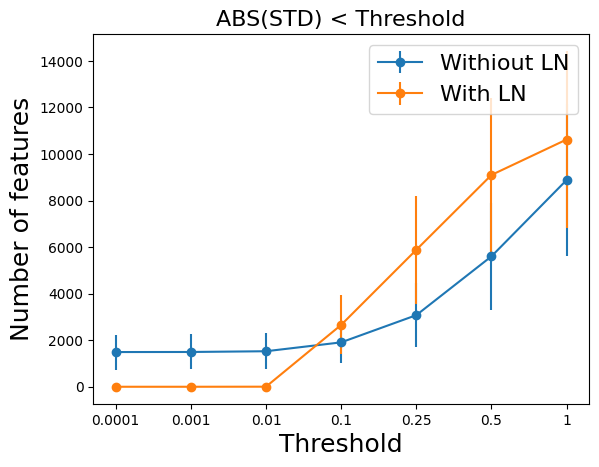

In [37]:
plt.errorbar(range(7),  means, yerr=std,fmt='-o', label="Withiout LN")
plt.errorbar(range(7), means_ln, yerr=std_ln,fmt='-o', label="With LN")
plt.xticks(ticks=range(7), labels=stds);
plt.title("ABS(STD) < Threshold", fontsize=16);
plt.xlabel("Threshold", fontsize=18);
plt.ylabel("Number of features", fontsize=18);
plt.legend(fontsize=16);

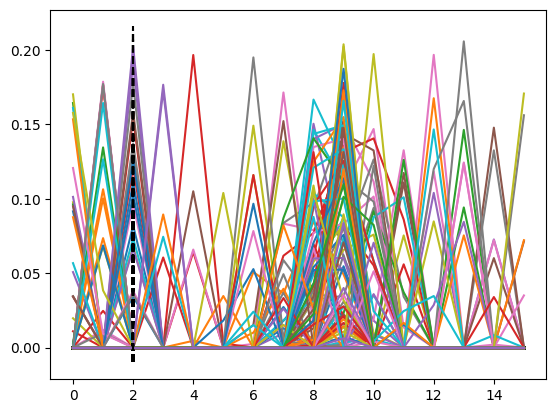

In [78]:
k = 0
for i in range(video.shape[0]):
    seq = video[i].detach().numpy()
    #if abs(seq[-1] - seq[0]) < 0.001:
    if np.abs(seq.std()) < 0.05:
        k += 1
        plt.plot(seq)
        plt.vlines(np.where(lab==1)[0][0], seq.min() - 0.01, seq.max() + 0.01,  linestyles='dashed', color='black');


In [79]:
k

885